<span style="color:#87cefa; font-size:200%">Plots for Summery 2/4 2022</span> 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.special import rel_entr
import pickle
from mpl_toolkits.mplot3d import axes3d
from scipy.ndimage.filters import gaussian_filter

import matplotlib.patches as patches

In [7]:
ny = 36
nx = 96
co_mesh = np.load("./conv_geo_mesh_center.npy")
co_mesh_x = np.load("./conv_geo_mesh_x.npy")
co_mesh_y = np.load("./conv_geo_mesh_y.npy")

al_mesh = np.load("./al_geo_mesh_center.npy")
al_mesh_x = np.load("./al_geo_mesh_x.npy")
al_mesh_y = np.load("./al_geo_mesh_y.npy")

co_facing = np.load("./gs_b2fgmtry.npy")
al_facing = np.load("./gs_b2fgmtry_al.npy")


co_new_mesh = np.load("./new_mesh_co_geo_mesh_center.npy")
co_new_mesh_x = np.load("./new_mesh_co_geo_mesh_x.npy")
co_new_mesh_y = np.load("./new_mesh_co_geo_mesh_y.npy")
co_newmesh_facing = np.load("./gs_new_mesh_co.npy")


al_new_mesh = np.load("./new_mesh_al_geo_mesh_center.npy")
al_new_mesh_x = np.load("./new_mesh_al_geo_mesh_x.npy")
al_new_mesh_y = np.load("./new_mesh_al_geo_mesh_y.npy")
al_newmesh_facing = np.load("./gs_new_mesh_al.npy")


newSAS_mesh = np.load("./new_SAS_geo_mesh_center.npy")
newSAS_mesh_x = np.load("./new_SAS_geo_mesh_y.npy")
newSAS_mesh_y = np.load("./new_SAS_geo_mesh_y.npy")
newSAS_facing = np.load("./gs_new_SAS.npy")


print(np.shape(co_facing))
print(np.shape(al_facing))
def co_distance_center(first_point, second_point):
    x_range = x_co_meshinfo[first_point[1],first_point[0]]-x_co_meshinfo[second_point[1],second_point[0]]
    y_range = y_co_meshinfo[first_point[1],first_point[0]]-y_co_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def co_distance_point(first_point, second_point):
    x_range = co_mesh_x[first_point[2],first_point[1],first_point[0]]-co_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = co_mesh_y[first_point[2],first_point[1],first_point[0]]-co_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_center(first_point, second_point):
    x_range = x_al_meshinfo[first_point[1],first_point[0]]-x_al_meshinfo[second_point[1],second_point[0]]
    y_range = y_al_meshinfo[first_point[1],first_point[0]]-y_al_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_point(first_point, second_point):
    x_range = al_mesh_x[first_point[2],first_point[1],first_point[0]]-al_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = al_mesh_y[first_point[2],first_point[1],first_point[0]]-al_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

#new geo files
def co_new_mesh_distance_center(first_point, second_point):
    x_range = x_co_new_meshinfo[first_point[1],first_point[0]]-x_co_new_meshinfo[second_point[1],second_point[0]]
    y_range = y_co_new_meshinfo[first_point[1],first_point[0]]-y_co_new_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result
def co_new_mesh_distance_point(first_point, second_point):
    x_range = co_new_mesh_x[first_point[2],first_point[1],first_point[0]]-co_new_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = co_new_mesh_y[first_point[2],first_point[1],first_point[0]]-co_new_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result


def al_new_mesh_distance_center(first_point, second_point):
    x_range = x_al_new_meshinfo[first_point[1],first_point[0]]-x_al_new_meshinfo[second_point[1],second_point[0]]
    y_range = y_al_new_meshinfo[first_point[1],first_point[0]]-y_al_new_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_new_mesh_distance_point(first_point, second_point):
    x_range = al_new_mesh_x[first_point[2],first_point[1],first_point[0]]-al_new_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = al_new_mesh_y[first_point[2],first_point[1],first_point[0]]-al_new_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result


def newSAS_distance_center(first_point, second_point):
    x_range = x_newSAS_meshinfo[first_point[1],first_point[0]]-x_newSAS_meshinfo[second_point[1],second_point[0]]
    y_range = y_newSAS_meshinfo[first_point[1],first_point[0]]-y_newSAS_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def newSAS_distance_point(first_point, second_point):
    x_range = newSAS_mesh_x[first_point[2],first_point[1],first_point[0]]-newSAS_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = newSAS_mesh_y[first_point[2],first_point[1],first_point[0]]-newSAS_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result


def total_pressure(ne,te,na,ti):
    pr = ne[:,:]*te[:,:] + na[1,:,:]*ti[:,:] +np.sum(na[2:9,:,:]*ti[:,:],axis = 0)+np.sum(na[9:,:,:]*ti[:,:],axis = 0)
    return pr

def neutral_pressure(na,ti):
    pr = na[0,:,:]*ti[:,:]+ na[0,:,:]*ti[:,:]+ na[2,:,:]*ti[:,:]+na[2,:,:]*ti[:,:]+na[9,:,:]*ti[:,:]
    return pr
    
dumx_co_meshinfo = co_mesh[:,0]
dumy_co_meshinfo = co_mesh[:,1]
x_co_meshinfo = dumx_co_meshinfo.reshape(ny+2,nx+2)
y_co_meshinfo = dumy_co_meshinfo.reshape(ny+2,nx+2)

dumx_al_meshinfo = al_mesh[:,0]
dumy_al_meshinfo = al_mesh[:,1]
x_al_meshinfo = dumx_al_meshinfo.reshape(ny+2,nx+2)
y_al_meshinfo = dumy_al_meshinfo.reshape(ny+2,nx+2)

dumx_co_new_meshinfo = co_new_mesh[:,0]
dumy_co_new_meshinfo = co_new_mesh[:,1]
x_co_new_meshinfo = dumx_co_new_meshinfo.reshape(ny+2,nx+2)
y_co_new_meshinfo = dumy_co_new_meshinfo.reshape(ny+2,nx+2)

dumx_al_new_meshinfo = al_new_mesh[:,0]
dumy_al_new_meshinfo = al_new_mesh[:,1]
x_al_new_meshinfo = dumx_al_new_meshinfo.reshape(ny+2,nx+2)
y_al_new_meshinfo = dumy_al_new_meshinfo.reshape(ny+2,nx+2)

dumx_newSAS_meshinfo = newSAS_mesh[:,0]
dumy_newSAS_meshinfo = newSAS_mesh[:,1]
x_newSAS_meshinfo = dumx_newSAS_meshinfo.reshape(ny+2,nx+2)
y_newSAS_meshinfo = dumy_newSAS_meshinfo.reshape(ny+2,nx+2)


#po_dumx_meshinfo = convmesh[:,0]
#po_dumy_meshinfo = convmesh[:,1]
#po_x_meshinfo = dumx_meshinfo.reshape(4,ny+2,nx+2)
#po_y_meshinfo = dumy_meshinfo.reshape(4,ny+2,nx+2)
co_sep_out_target = np.zeros(2)
co_sep_out_target[0] = co_mesh_x[1,18,96]
co_sep_out_target[1] = co_mesh_y[1,18,96]
co_mesh_x_cen = np.sum(co_mesh_x, axis = 0)/4
co_mesh_y_cen = np.sum(co_mesh_y, axis = 0)/4

al_sep_out_target = np.zeros(2)
al_sep_out_target[0] = al_mesh_x[1,18,96]
al_sep_out_target[1] = al_mesh_y[1,18,96]
al_mesh_x_cen = np.sum(al_mesh_x, axis = 0)/4
al_mesh_y_cen = np.sum(al_mesh_y, axis = 0)/4

co_new_mesh_sep_out_target = np.zeros(2)
co_new_mesh_sep_out_target[0] = co_mesh_x[1,18,96]
co_new_mesh_sep_out_target[1] = co_mesh_y[1,18,96]
co_new_mesh_x_cen = np.sum(co_mesh_x, axis = 0)/4
co_new_mesh_y_cen = np.sum(co_mesh_y, axis = 0)/4

al_new_mesh_sep_out_target = np.zeros(2)
al_new_mesh_sep_out_target[0] = al_new_mesh_x[1,18,96]
al_new_mesh_sep_out_target[1] = al_new_mesh_y[1,18,96]
al_new_mesh_x_cen = np.sum(al_new_mesh_x, axis = 0)/4
al_new_mesh_y_cen = np.sum(al_new_mesh_y, axis = 0)/4

newSAS_sep_out_target = np.zeros(2)
newSAS_sep_out_target[0] = newSAS_mesh_x[1,18,96]
newSAS_sep_out_target[1] = newSAS_mesh_y[1,18,96]
newSAS_mesh_x_cen = np.sum(newSAS_mesh_x, axis = 0)/4
newSAS_mesh_y_cen = np.sum(newSAS_mesh_y, axis = 0)/4



X_point = []



co_sep_out_target_dist = np.zeros(ny+2)
co_sep_in_target_dist = np.zeros(ny+2)     
co_sep_out_midplane_dist = np.zeros(ny+2)
co_sep_in_midplane_dist = np.zeros(ny+2)

co_new_mesh_sep_out_midplane_dist = np.zeros(ny+2)
co_new_mesh_sep_in_midplane_dist = np.zeros(ny+2)
co_new_mesh_sep_out_target_dist = np.zeros(ny+2)
co_new_mesh_sep_in_target_dist = np.zeros(ny+2)

al_sep_out_midplane_dist = np.zeros(ny+2)
al_sep_in_midplane_dist = np.zeros(ny+2)
al_sep_out_target_dist = np.zeros(ny+2)
al_sep_in_target_dist = np.zeros(ny+2)


al_new_mesh_sep_out_midplane_dist = np.zeros(ny+2)
al_new_mesh_sep_in_midplane_dist = np.zeros(ny+2)
al_new_mesh_sep_out_target_dist = np.zeros(ny+2)
al_new_mesh_sep_in_target_dist = np.zeros(ny+2)

newSAS_sep_out_midplane_dist = np.zeros(ny+2)
newSAS_sep_in_midplane_dist = np.zeros(ny+2)
newSAS_sep_out_target_dist = np.zeros(ny+2)
newSAS_sep_in_target_dist = np.zeros(ny+2)


conv_Xpt_dist = np.zeros(20)
al_Xpt_dist = np.zeros(20)






for i in range(ny+2):
    co_sep_out_midplane_dist[i] = co_distance_point([52,i,1],[52,18,1])
    co_sep_in_midplane_dist[i]  = co_distance_point([29,i,1],[29,18,1])
    co_sep_out_target_dist[i] = co_distance_point([96,i,1],[96,18,1])
    co_sep_in_target_dist[i] = co_distance_point([1,i,1],[1,18,1])


    co_new_mesh_sep_out_midplane_dist[i] = co_new_mesh_distance_point([52,i,1],[52,18,1])
    co_new_mesh_sep_in_midplane_dist[i]  = co_new_mesh_distance_point([29,i,1],[29,18,1])
    co_new_mesh_sep_out_target_dist[i] = co_new_mesh_distance_point([96,i,1],[96,18,1])
    co_new_mesh_sep_in_target_dist[i]  = co_new_mesh_distance_point([1,i,1],[1,18,1])

    al_sep_out_midplane_dist[i] = al_distance_point([52,i,1],[52,18,1])
    al_sep_in_midplane_dist[i]  = al_distance_point([29,i,1],[29,18,1])
    al_sep_out_target_dist[i] = al_distance_point([96,i,1],[96,18,1])
    al_sep_in_target_dist[i]  = al_distance_point([1,i,1],[1,18,1])


    al_new_mesh_sep_out_midplane_dist[i] = al_new_mesh_distance_point([52,i,1],[52,18,1])
    al_new_mesh_sep_in_midplane_dist[i]  = al_new_mesh_distance_point([29,i,1],[29,18,1])
    al_new_mesh_sep_out_target_dist[i] = al_new_mesh_distance_point([96,i,1],[96,18,1])
    al_new_mesh_sep_in_target_dist[i]  = al_new_mesh_distance_point([1,i,1],[1,18,1])
    

    newSAS_sep_out_midplane_dist[i] = newSAS_distance_point([52,i,1],[52,18,1])
    newSAS_sep_in_midplane_dist[i]  = newSAS_distance_point([29,i,1],[29,18,1])
    newSAS_sep_out_target_dist[i] = newSAS_distance_point([96,i,1],[96,18,1])
    newSAS_sep_in_target_dist[i]  = newSAS_distance_point([1,i,1],[1,18,1])
    
    if i<18:
        co_sep_out_midplane_dist[i] = -co_sep_out_midplane_dist[i]
        co_sep_in_midplane_dist[i]  = -co_sep_in_midplane_dist[i]
        co_sep_out_target_dist[i] = -co_sep_out_target_dist[i]
        co_sep_in_target_dist[i] = -co_sep_in_target_dist[i]

        co_new_mesh_sep_out_midplane_dist[i] = -co_new_mesh_sep_out_midplane_dist[i]
        co_new_mesh_sep_in_midplane_dist[i]  = -co_new_mesh_sep_in_midplane_dist[i]
        co_new_mesh_sep_out_target_dist[i] = -co_new_mesh_sep_out_target_dist[i]
        co_new_mesh_sep_in_target_dist[i] = -co_new_mesh_sep_in_target_dist[i]

        
        al_sep_out_midplane_dist[i] = -al_sep_out_midplane_dist[i]
        al_sep_in_midplane_dist[i] = -al_sep_in_midplane_dist[i]
        al_sep_out_target_dist[i] = -al_sep_out_target_dist[i]
        al_sep_in_target_dist[i] = -al_sep_in_target_dist[i]
        
        al_new_mesh_sep_out_midplane_dist[i] = -al_new_mesh_sep_out_midplane_dist[i]
        al_new_mesh_sep_in_midplane_dist[i] = -al_new_mesh_sep_in_midplane_dist[i]
        al_new_mesh_sep_out_target_dist[i] = -al_new_mesh_sep_out_target_dist[i]
        al_new_mesh_sep_in_target_dist[i] = -al_new_mesh_sep_in_target_dist[i]

        
        newSAS_sep_out_midplane_dist[i] = -newSAS_sep_out_midplane_dist[i]
        newSAS_sep_in_midplane_dist[i] = -newSAS_sep_in_midplane_dist[i]
        newSAS_sep_out_target_dist[i] = -newSAS_sep_out_target_dist[i]
        newSAS_sep_in_target_dist[i] = -newSAS_sep_in_target_dist[i]
        




    
for i in range(20):
    conv_Xpt_dist[i] = co_distance_center([78,18],[78+i,18])

    
    
for i in range(20):
    al_Xpt_dist[i] = al_distance_center([78,18],[78+i,18])
print(conv_Xpt_dist)
print(al_Xpt_dist)



(3, 38, 98)
(3, 38, 98)
[0.         0.02024052 0.0430307  0.06776496 0.09401868 0.12139181
 0.14949061 0.17792684 0.2063151  0.23427089 0.26140689 0.28732694
 0.31161978 0.33386324 0.35365201 0.37062728 0.38446747 0.39484765
 0.40141755 0.40372746]
[0.         0.0254457  0.05394852 0.08486258 0.11766655 0.15185898
 0.18694875 0.22245149 0.25788705 0.29277786 0.3266464  0.35900945
 0.3893695  0.41720759 0.44200125 0.46327177 0.48060219 0.49359053
 0.50180683 0.50469472]


In [8]:
fht_b2fplasmf_new_mesh_al_2_5MW_Ne_0 = np.load("./../../20220718_data/fht_b2fplasmf_new_mesh_al_2.5MW_Ne_0.npy")
fht_b2fplasmf_new_mesh_co_32MW_Ne_0 = np.load("./../../20220718_data/fht_b2fplasmf_new_mesh_co_32MW_Ne_0.npy")
fht_b2fplasmf_new_SAS_2_5MW_Ne_0 = np.load("./../../20220718_data/fht_b2fplasmf_new_SAS_2.5MW_Ne_0.npy")

#fht_b2fplasmf_co_KSTAR_noNe = np.load("./../fht_b2fplasmf_co_KSTAR_noNe.npy")



NameError: name 'fht_b2fplasmf_co_KSTAR_noNe' is not defined

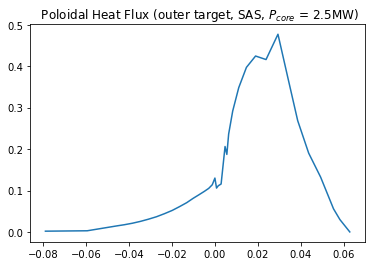

In [9]:
plt.title(r" Poloidal Heat Flux (outer target, SAS, $P_{core}$ = 2.5MW)")
plt.plot(al_new_mesh_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_mesh_al_2_5MW_Ne_0[0,1:,96])/(al_newmesh_facing[0,1:,96]*1000000), label = r"new Mesh SAS")
#plt.plot(newSAS_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_SAS_2_5MW_Ne_0[0,1:,96])/(newSAS_facing[0,1:,96]*1000000),label = r"new SAS")
plt.plot(co_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000))

plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()
#plt.savefig("SAS heat flux w.r.t impurity.png")


plt.show()